# Импорт библиотек

In [34]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [35]:
sns.set(style='darkgrid')

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Ход работы

Кривые падения забойного давления представляют собой один из наиболее распространенных методов гидродинамических исследований скважин на неустановившихся режимах фильтрации. 

Гидродинамические исследования скважин – это комплекс мероприятий, проводимых на скважинах в соответствии с программами, предусматривающими замеры ряда параметров (изменение забойного давления, дебита, температуры и т.д.), относящихся к продуктивным нефтегазовым пластам. Затем полученные данные обрабатываются, анализируются и интерпретируются для определения параметров пласта и скважин.

Для оценки параметров пласта по фактическим данным, полученным в ходе гидродинамических исследований, строится кривая падения забойного давления в полулогарифмических координатах. Затем на графике находится прямолинейный участок и определяется его уклон. По этому уклону рассчитываются и оцениваются параметры пласта.

# Что нужно сделать?

- Рассчитать производную давления по логарифму времени Хорнера с использованием формулы второго порядка и неравномерного шага.
- Построить диагностический билогарифмический график и определить нужный интервал времени.
- С помощью МНК для оценки коэффициентов модели линейной регресси построить линейный тренд на исходном графике в найденном интервале времени
- Вычислить проницаемость и пластовое давление.
- Оценить доверительные интервалы с уровнем доверия 0.9 для проницаемости и пластового давления, используя статистические оценки МНК параметров линейного тренда.

# Импорт данных

В прилагаемом файле данные кривой восстановления давления (КВД).
Первый столбик - логарифм времени Хорнера. Второй столбик - давление в барах (1 бар=10^5 Па).

In [37]:
df = read_csv('C:/Users/ahrus/Downloads/horner-plot.csv', sep=';', encoding='utf-8')
df.head(5)

,log_time,pressure
0,-3.964767,187.423949
1,-3.663616,187.489249
2,-3.487519,187.551449
3,-3.362603,187.623349
4,-3.265728,187.733649


# Визуализация данных 

<Axes: xlabel='log_time', ylabel='pressure'>

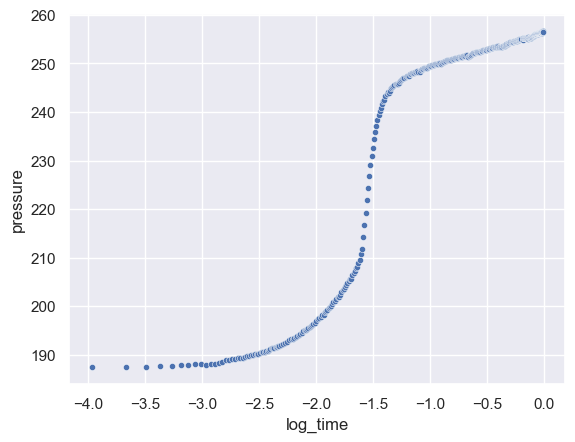

In [38]:
sns.scatterplot(df, x='log_time', y='pressure', s=20)

# Расчет производной давления

формула, которая учитывает неравномерность шага по аргументу

\begin{equation}
\frac{dp}{dt} \approx \frac{1}{h_2 + h_1} \left[ -(2 + \delta) P_{i-1} + \frac{(1 + \delta)^2}{\delta} P_{i} - \frac{1}{\delta} P_{i+1} \right]
\end{equation}

\begin{equation}
h_1 = \log t_{i+1} - \log t_{i}
\end{equation}

\begin{equation}
h_2 = \log t_{i} - \log t_{i-1}
\end{equation}

\begin{equation}
\delta = \frac{h_1}{h_2}
\end{equation}


Для вывода этой формулы производной давления по логарифму времени Хорнера с использованием второго порядка и неравномерного шага по аргументу, мы можем начать с разложения Тейлора. Предположим, что функция давления P(t) определена и дважды дифференцируема на некотором интервале. Разложения Тейлора для P(t) в точках t_{i-1}, t_{i} и t_{i+1} будут выглядеть следующим образом:

\begin{equation}
P(t_{i-1}) = P(t_i) - h_2 P'(t_i) + \frac{h_2^2}{2} P''(t_i) + O(h_2^3) \;\;\; (1)
\end{equation}

\begin{equation}
P(t_{i+1}) = P(t_i) + h_1 P'(t_i) + \frac{h_1^2}{2} P''(t_i) + O(h_1^3) \;\;\;(2)
\end{equation}


Здесь O(h^3) обозначает остаточные члены более высоких порядков, которые мы не учитываем в приближении. Теперь мы можем выразить производную P'(t_i) из этих уравнений, исключив P''(t_i) из уравнений:

\begin{equation}
P'(t_i) = \frac{-(2 + \delta) P(t_{i-1}) + \frac{(1 + \delta)^2}{\delta} P(t_i) - \frac{1}{\delta} P(t_{i+1})}{h_2 + h_1}
\end{equation}


Чтобы определить порядок аппроксимации для формулы производной, давайте сначала найдем разность между уравнениями (1) и (2) и затем решим полученное уравнение относительно $P'(t_i)$. Это позволит нам избавиться от $P''(t_i)$ и выразить $P'(t_i)$ через $P(t_{i-1})$, $P(t_i)$ и $P(t_{i+1})$.

\begin{equation}
h_1 = \ln t_{i+1} - \ln t_{i}
\end{equation}

\begin{equation}
h_2 = \ln t_{i} - \ln t_{i-1}
\end{equation}

\begin{equation}
P(t_{i-1}) = P(t_i) - h_2 P'(t_i) + \frac{h_2^2}{2} P''(t_i) + O(h_2^3) \;\;\; (1)
\end{equation}

\begin{equation}
P(t_{i+1}) = P(t_i) + h_1 P'(t_i) + \frac{h_1^2}{2} P''(t_i) + O(h_1^3) \;\;\;(2)
\end{equation}




Исключим $P''(t_i)$. Вычитаем уравнение $(1)\cdot \frac{h_1^2}{h_2^2}$  из уравнения (2):

\begin{equation}
P(t_{i+1}) - P(t_{i-1})\cdot \frac{h_1^2}{h_2^2} = h_1 P'(t_i) - \frac{h_1^2}{h_2}P'(t_i) + O(h_1^3) - O(h_1^2 h_2).
\end{equation}

\begin{equation}
P(t_{i+1}) - P(t_{i-1})\cdot \frac{h_1^2}{h_2^2} = (h_1  - \frac{h_1^2}{h_2} )P'(t_i) + O(h_1^3) - O(h_1^2 h_2).
\end{equation}

Теперь давайте выразим $P'(t_i)$:

\begin{equation}
(h_1  - \frac{h_1^2}{h_2} )P'(t_i) = P(t_{i+1}) - P(t_{i-1})\cdot \frac{h_1^2}{h_2^2} - O(h_1^3) + O(h_1^2 h_2).
\end{equation}



Сравнивая это уравнение с уравнением (3), мы видим, что они идентичны с точностью до $O(h_1^3)$ и $O(h_2^3)$. Если мы предполагаем, что ошибки аппроксимации уравнения (3) также имеют порядок $O(h_1^3)$ и $O(h_2^3)$, то порядок аппроксимации формулы для производной равен 2 (так как наиболее высокая степень $h_1$ и $h_2$ в числителе равна 2).

Порядок аппроксимации формулы для производной (3) составляет 2.

In [63]:
dp_dt = np.zeros(len(df.log_time))
for i in range(1, len(df.log_time) - 1):
    h1 = df.log_time.iloc[i + 1] - df.log_time.iloc[i]
    h2 = df.log_time.iloc[i] - df.log_time.iloc[i - 1]
    delta = h1 / h2
        
    dp_dt[i] = (h2 + h1)**(-1) * (-(2 + delta) * df.pressure.iloc[i - 1] + (1 + delta)**2 / delta * df.pressure.iloc[i] - 1 / delta * df.pressure.iloc[i + 1])

In [40]:
df['dpdt'] = dp_dt

# Диагностический билогарифмический график

Диагностический билогарифмический график - это графический метод анализа данных гидродинамических исследований скважин на неустановившихся режимах фильтрации. Он используется для определения параметров пласта и характеристик скважины, а также для оценки эффективности работы скважины и долгосрочного поведения пласта.

График строится в полулогарифмических координатах, на которых откладываются изменение забойного давления на скважине (в логарифмической шкале) и логарифм времени после начала испытания скважины.

Анализ диагностического билогарифмического графика позволяет определить многие параметры пласта, такие как проницаемость и пластовое давление.

Для выбора нужного интервала времени на диагностическом билогарифмическом графике, обратим внимание на участок графика, где производная давления по логарифму времени Хорнера (dP/d(log(t))) стабилизируется и становится более или менее постоянной. Этот участок графика будет соответствовать линейной части графика на билогарифмической шкале, и его можно использовать для построения линейного тренда методом наименьших квадратов.

Text(0, 0.5, 'Log(dP/d(Log(Time)))')

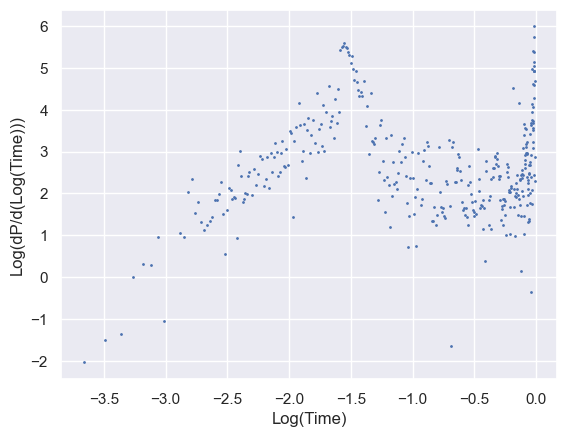

In [41]:
plt.scatter(df.log_time, np.log(dp_dt), s=1)
plt.xlabel('Log(Time)')
plt.ylabel('Log(dP/d(Log(Time)))')

Выберем участок (по оси абсцисс) -1.1 до -.15
Этот участок соответствует интервалу времени, когда наблюдается режим 
радиального фильтрационного притока (РФП). На этом участве в дальнейшем будет строиться линейный тренд.

In [42]:
new_logtime = df.log_time[(df.log_time > -1.1) & (df.log_time < -.15)]
new_pressure = df.pressure[(df.log_time > -1.1) & (df.log_time < -.15)]
new_dpdt = df.dpdt[(df.log_time > -1.1) & (df.log_time < -.15)]

Text(0, 0.5, 'dp')

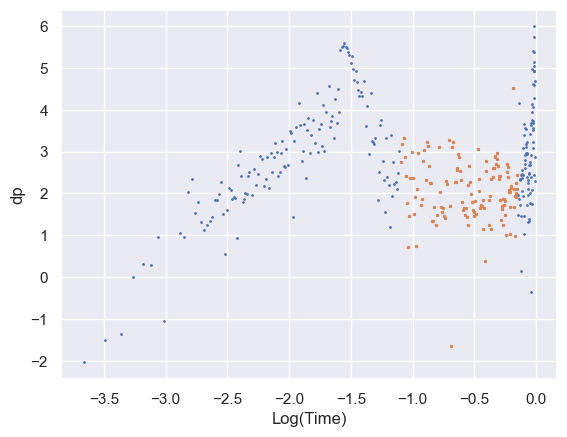

In [57]:
plt.scatter(df.log_time, np.log(dp_dt), s=1)
plt.scatter(new_logtime, np.log(new_dpdt), s=2)
plt.xlabel('Log(Time)')
plt.ylabel('dp')

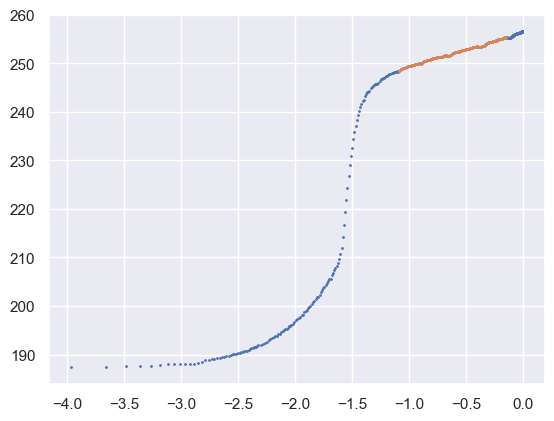

In [60]:
#выбранный фрагмент на первоначальном графике
plt.scatter(df.log_time, df.pressure, s=1)
plt.scatter(new_logtime, new_pressure, s=1)

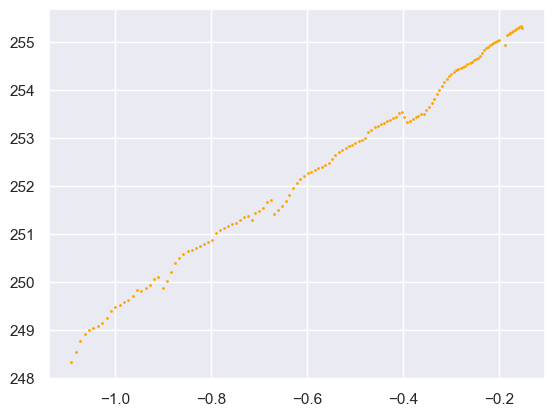

In [62]:
#выбранный фрагмент отдельно
plt.scatter(new_logtime, new_pressure, color='orange', s=1)

# Построение модели линейной регрессии

С помощью метода наименьших квадратов строим линейный тренд
на выбранном интервале

$$\vec{Y} = \beta_0 + \beta_1 \cdot X + \vec{\varepsilon}$$
$$ \vec{b} - {оценки \: коэффициентов} \: \vec{\beta}$$
$$\vec{b} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \vec{y}$$

In [46]:
# оценка коэффициентов регрессии с помощью МНК
def model(X, y):
    y = np.array(y)

    XtX = X.T @ X
    Xty = X.T @ y
    beta_hat = np.linalg.solve(XtX, Xty)

    return beta_hat

In [47]:
X = np.array([[1, i] for i in new_logtime])
coeffs_ = model(X, new_pressure)
coeffs_

array([256.33963483,   6.94034181])

После построения линейного тренда 
мы получили значения коэффициентов, которые в свою очередь 
определяют пластовое давление и тангенс угла наклона

$$ \hat{\beta_0} = 256.3396, \: \hat{\beta_1} = 6.9403 $$

# Графически

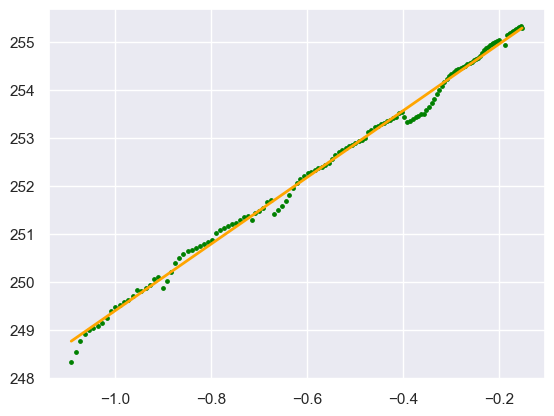

In [48]:
#линейный тренд для выбранного участка
plt.scatter(new_logtime, new_pressure, s=6, color='green')
plt.plot(new_logtime, np.dot(X, coeffs_), 'orange', linewidth=2)

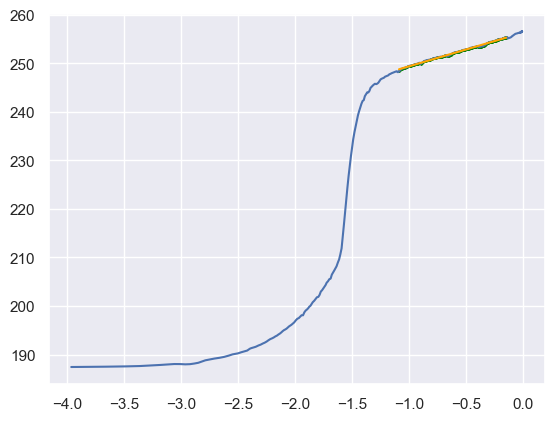

In [51]:
#линейный тренд для выбранного участка на фоне всего графика
plt.plot(df.log_time, df.pressure)
plt.scatter(new_logtime, new_pressure, s=1, color='green')
plt.plot(new_logtime, np.dot(X, coeffs_), 'orange')

# Вычисление проницаемости и пластового давления


проницаемость:

$$ \hat{\beta_1} = \tan{a} = \frac{Q\mu B}{4\pi k h } \to k = \frac{Q\mu B}{4 \pi \hat{\beta_1}h}$$

In [52]:
# исходные данные
q = 150 / (86400)  # м3/сек
mu = 1.18e-3       # Па*с
B = 1.1
h = 1.8            # м

In [55]:
#Проницаемость по методу Хорнера
k=q*mu*B*10**12/(coeffs_[1]*4*np.pi*h*10**5)
print("Проницаемость равна: ", k, 'Дарси')

Проницаемость равна:  0.14354530099058685 Дарси


In [56]:
# Пластовое давление по методу Хорнера
p_pl = coeffs_[0]
print("Пластовое давление равно: ", p_pl, 'бар')

Пластовое давление равно:  256.3396348284901 бар


# Доверительные интервалы

$$ \vec{Y} = X \cdot \vec{\hat{\beta}}$$
$$ \vec{e} = \vec{Y} - \vec{y} $$
$$ \hat{\sigma} = \frac{\vec{e'}\vec{e}}{(n-2)}$$

In [170]:
# Подсчет ошибки
Y =  X @ coeffs_
e = Y - new_pressure
sigma=e@e/(len(e)-2)

$$ v = (\mathbf{X}^T \mathbf{X})^{-1} $$
$$ \delta = t_{0.9,n-2}\sqrt{\hat{\sigma} v_{jj}} $$
$$ \frac{q \mu B \cdot 10^{12}}{(\beta_1 + \delta_1)4\pi h \cdot 10^5} < k < \frac{q \mu B \cdot 10^{12}}{(\beta_1 - \delta_1)4\pi h \cdot 10^5} $$
$$ \beta_0 - \delta_0 < P < \beta_0 +\delta_0 $$

In [169]:
v=np.linalg.inv(X.T @ X)
delta=t.ppf(0.9,len(e)-2)*np.sqrt(sigma*v.diagonal())
print('Доверительный интервал для проницаемости: ')
print( q*mu*B*10**12/((coeffs_[1]+delta[1])*4*np.pi*h*10**5), '<',k,'<' ,q*mu*B*10**12/((coeffs_[1]-delta[1])*4*np.pi*h*10**5))
print('\nДоверительный интервал для пластового давления: ')
print(coeffs_[0]-delta[0],'<',coeffs_[0],'<',coeffs_[0]+delta[0])

Доверительный интервал для проницаемости: 
0.13892468709176617 < 0.14009674786705106 < 0.1412887534738458

Доверительный интервал для пластового давления: 
256.3690059824535 < 256.41061917908246 < 256.45223237571145
